# Predicting Housing Prices with Regularized Regression

You work for a real estate analytics firm, and your task is to build a predictive model to estimate house prices
based on various features. You have a dataset containing information about houses, such as square footage, 
number of bedrooms, number of bathrooms, and other relevant attributes. 

In this case study, you'll explore the application of Lasso and Ridge regression to improve the predictive performance 
of the model:

1. Data Preparation:
    a. Load the dataset using pandas.
    b. Explore and clean the data. Handle missing values and outliers.
    c. Split the dataset into training and testing sets.
2. Implement Lasso Regression:
    a. Choose a set of features (independent variables, X) and house prices as the dependent variable (y).
    b. Implement Lasso regression using scikit-learn to predict house prices based on the selected features.
    c. Discuss the impact of L1 regularization on feature selection and coefficients.
3. Evaluate the Lasso Regression Model:
    a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Lasso regression model.
    b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features.
4. Implement Ridge Regression:
    a. Select the same set of features as independent variables (X) and house prices as the dependent variable (y).
    b. Implement Ridge regression using scikit-learn to predict house prices based on the selected features.
    c. Explain how L2 regularization in Ridge regression differs from L1 regularization in Lasso
5. Evaluate the Ridge Regression Model:
    a. Calculate the MAE, MSE, and RMSE for the Ridge regression model.
    b. Discuss the benefits of Ridge regression in handling multicollinearity among features and its impact on the model's coefficients.
6. Model Comparison:
    a. Compare the results of the Lasso and Ridge regression models.
    b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression.
7. Hyperparameter Tuning:
    a. Explore hyperparameter tuning for Lasso and Ridge, such as the strength of regularization, and discuss how different hyperparameters affect the models.
8. Model Improvement:
    a. Investigate any feature engineering or data preprocessing techniques that can enhance the performance of the regularized regression models.
9. Conclusion:
    a. Summarize the findings and provide insights into how Lasso and Ridge regression can be valuable tools for estimating house prices and handling complex datasets.
10. Presentation:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations, particularly focusing on the advantages and limitations of using regularized regression techniques in real estate prediction.


In this case study, you are required to demonstrate your ability to preprocess data, 
implement Lasso and Ridge regression models, evaluate their performance, and make recommendations 
for improving the models. This case study should assess your knowledge of regularized regression techniques and 
how to select and tune hyperparameters for these models.

# 1. Data Preparation:
    a. Load the dataset using pandas.
    b. Explore and clean the data. Handle missing values and outliers.
    c. Split the dataset into training and testing sets.


In [1]:
# a. Load the dataset using pandas.

import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first 4 rows of the dataset to understand its structure
print(df.head(4))

               date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 00:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 00:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 00:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 00:00   420000.0         3       2.25         2000      8030   

   floors  yr_built  
0     1.5      1955  
1     2.0      1921  
2     1.0      1966  
3     1.0      1963  


In [2]:
# b. Explore and clean the data. Handle missing values and outliers.

# Explore the dataset to identify missing values and outliers
print(df.info())  # showing info of all including missing values

print()
print(df.describe())  # identify outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4600 non-null   object 
 1   price        4600 non-null   float64
 2   bedrooms     4600 non-null   int64  
 3   bathrooms    4600 non-null   float64
 4   sqft_living  4600 non-null   int64  
 5   sqft_lot     4600 non-null   int64  
 6   floors       4600 non-null   float64
 7   yr_built     4600 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 287.6+ KB
None

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05

In [10]:
# Handle missing values (for example, by dropping rows with missing values)

print(df.isnull().sum())

df.dropna(inplace=True)

# Detect and handle outliers using Interquartile Range (IQR) method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
yr_built       0
dtype: int64


C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_5256\2694599707.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_5256\2694599707.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [13]:
#c. Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Features (all columns except 'price')
y = df['price']  # Target variable ('price' column)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2800, 7)
X_test shape: (700, 7)
y_train shape: (2800,)
y_test shape: (700,)


In [ ]:
2. Implement Lasso Regression:
    a. Choose a set of features (independent variables, X) and house prices as the dependent variable (y).
    b. Implement Lasso regression using scikit-learn to predict house prices based on the selected features.
    c. Discuss the impact of L1 regularization on feature selection and coefficients.


In [14]:
#a. Choose a set of features (independent variables, X) and house prices as the dependent variable (y).

# Choosing a set of features (independent variables, X) and house prices as the dependent variable (y)

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
X_train = df[selected_features]
y_train = df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [23]:
#b. Implement Lasso regression using scikit-learn to predict house prices based on the selected features.
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


# Implement Lasso Regression
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)


# Make predictions on the test set
lasso_predictions = lasso_reg.predict(X_test)

# Calculate Lasso regression scores and R-Square
lasso_train_score = lasso_reg.score(X_train, y_train)
lasso_test_score = lasso_reg.score(X_test, y_test)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Print Lasso regression scores and R-Square
print('Lasso Train Score:\t', lasso_train_score)
print('Lasso Test Score:\t', lasso_test_score)
print('Lasso R-Square:\t', lasso_r2)

Lasso Train Score:	 0.3269747398819808
Lasso Test Score:	 0.3238215064752157
Lasso R-Square:	 0.3238215064752157


In [ ]:
# c. Discuss the impact of L1 regularization on feature selection and coefficients.

Lasso regularization (L1) helps in picking the most important features for predicting something (like house prices). 
It does this by making less important features count for zero, so they don't affect predictions. 
This way, Lasso simplifies the prediction model and makes it easier to understand, especially when there are many features to consider. 
It's like highlighting the most important parts of a story and ignoring the less important details.

# 3. Evaluate the Lasso Regression Model:
    a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Lasso regression model.
    b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features.


In [26]:
#a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Lasso regression model.

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate predictions using the trained Lasso model
lasso_predictions = lasso_reg.predict(X_test)

# Calculate evaluation metrics
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)

# Print the evaluation metrics
print("Lasso Regression Mean Absolute Error (MAE):", lasso_mae)
print("Lasso Regression Mean Squared Error (MSE):", lasso_mse)
print("Lasso Regression Root Mean Squared Error (RMSE):", lasso_rmse)


Lasso Regression Mean Absolute Error (MAE): 122049.79719084353
Lasso Regression Mean Squared Error (MSE): 23099066122.423428
Lasso Regression Root Mean Squared Error (RMSE): 151983.7692729833


In [ ]:
# b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features.

How Lasso Helps Prevent Overfitting and Reduces Irrelevant Features:

1. Feature Selection:
    Lasso automatically selects essential features by driving the coefficients of less important features to zero. This feature selection property ensures that only relevant features are included in the model.
    By excluding irrelevant features, Lasso simplifies the model, reducing its complexity and making it less likely to memorize noise in the training data.
2. Regularization Strength (Alpha):
    Lasso introduces a regularization term (L1 norm) into the model's cost function. The strength of this regularization is controlled by the hyperparameter alpha.
    Increasing alpha forces more coefficients towards zero, discouraging the model from fitting the training data too closely. This constraint helps prevent overfitting by promoting a simpler model.
3. Handling Multicollinearity:
    Lasso can effectively handle multicollinearity, a situation where features are highly correlated. In such cases, Lasso tends to keep only one feature from a group of correlated features and sets the coefficients of the others to zero.
    By picking one representative feature from correlated groups, Lasso avoids redundancy and keeps the model focused on the most relevant information.
4. Interpretable and Sparse Models:
    Lasso produces sparse models where many feature coefficients are precisely zero. These zero coefficients indicate features that have no impact on predictions.
    Sparse models are easier to interpret, as they highlight the most significant variables without being affected by irrelevant or redundant features.
5. Bias-Variance Tradeoff:
    Lasso helps strike a balance between bias and variance. By limiting the complexity of the model through regularization, it reduces the variance (overfitting risk) while introducing a controlled amount of bias.
    This bias-variance tradeoff leads to a more generalizable model that performs well on unseen data.

In [ ]:
4. Implement Ridge Regression:
    a. Select the same set of features as independent variables (X) and house prices as the dependent variable (y).
    b. Implement Ridge regression using scikit-learn to predict house prices based on the selected features.
    c. Explain how L2 regularization in Ridge regression differs from L1 regularization in Lasso


In [28]:
# a. Select the same set of features as independent variables (X) and house prices as the dependent variable (y).
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
X = df[selected_features]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [30]:
# b. Implement Ridge regression using scikit-learn to predict house prices based on the selected features.
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


# Implement Ridge Regression
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X, y)

ridge_reg_pred=ridge_reg.predict(X_test)

print('Ridge Train_score:\t',ridge_reg.score(X_train,y_train))
print()
print('Ridge Test:\t',ridge_reg.score(X_test,y_test))
print()
print('Ridge R-Square: \t',r2_score(y_test,ridge_reg_pred))

Ridge Train_score:	 0.3269395091514087

Ridge Test:	 0.32416203588442805

Ridge R-Square: 	 0.32416203588442805


In [ ]:
# c. Explain how L2 regularization in Ridge regression differs from L1 regularization in Lasso
L2 Regularization in Ridge Regression vs. L1 Regularization in Lasso:

L2 Regularization (Ridge):

    Action: Ridge adds a penalty term to the model's equation that includes the squared values of all coefficients.
    Effect on Coefficients: Ridge shrinks all coefficients, making them smaller but not necessarily zero. It reduces the impact of all features proportionally.
    Result: Ridge keeps all features in the model, just at a reduced scale, promoting stability and preventing extreme values.

L1 Regularization (Lasso):

    Action: Lasso adds a penalty term with the absolute values of all coefficients.
    Effect on Coefficients: Lasso can force some coefficients to be exactly zero, effectively removing certain features from the model.
    Result: Lasso encourages sparse models, where only a subset of features is significant. It acts as a feature selector, making some features irrelevant for predictions.

# 5. Evaluate the Ridge Regression Model:
    a. Calculate the MAE, MSE, and RMSE for the Ridge regression model.
    b. Discuss the benefits of Ridge regression in handling multicollinearity among features and its impact on the model's coefficients.

In [36]:
#a. Calculate the MAE, MSE, and RMSE for the Ridge regression model.

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# we already have ridge_predictions in earlier so now 

# Calculate evaluation metrics
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

# Print the evaluation metrics
print("Ridge Regression Mean Absolute Error (MAE): ", ridge_mae)
print("Ridge Regression Mean Squared Error (MSE): ", ridge_mse)
print("Ridge Regression Root Mean Squared Error (RMSE): ", ridge_rmse)


Ridge Regression Mean Absolute Error (MAE):  122034.05465512133
Ridge Regression Mean Squared Error (MSE):  23087433230.49423
Ridge Regression Root Mean Squared Error (RMSE):  151945.49427506636


In [ ]:
#  b. Discuss the benefits of Ridge regression in handling multicollinearity among features and its impact on the model's coefficients.

Benefits of Ridge Regression in Handling Multicollinearity

1. Reducing Feature Impact: Ridge regression reduces the impact of highly correlated features without excluding them. 
                            It does this by shrinking the coefficients, preventing a single feature from dominating the model.

2. Stable Coefficients: Ridge provides stable and interpretable coefficients even in the presence of multicollinearity. 
                        By controlling the impact of correlated features, it prevents coefficients from fluctuating wildly when data changes.

3. Better Generalization: By handling multicollinearity, Ridge improves the model's ability to generalize well to unseen data. 
                        It reduces overfitting, ensuring that the model performs more reliably on new, unseen examples.

4. Model Stability: Ridge regression increases the stability of the model. 
                    Even small changes in the data won't lead to drastic changes in the coefficients. This stability is crucial for making reliable predictions, especially in dynamic real-world scenarios.


# 6. Model Comparison:
    a. Compare the results of the Lasso and Ridge regression models.
    b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression.

In [38]:
#a. Compare the results of the Lasso and Ridge regression models.

Lasso Regression:

    Feature Selection: Lasso can force some coefficients to zero, effectively selecting only the most important features. 
                       It provides a sparse model.
    Preventing Overfitting: Lasso can prevent overfitting by excluding irrelevant features, making it useful for high-dimensional datasets.

    Handling Multicollinearity: Lasso handles multicollinearity by selecting one feature from a group of correlated features.

Ridge Regression:

    Feature Impact Reduction: Ridge reduces the impact of all features without excluding any. 
                            It ensures all features contribute but to a lesser degree, promoting stability.

    Handling Multicollinearity: Ridge handles multicollinearity by reducing the coefficients of highly correlated features, preventing domination by a single feature.

    Stable Coefficients: Ridge provides stable and interpretable coefficients even in the presence of multicollinearity.


In [ ]:
#b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression.

Use Lasso When:

    if we suspect that only a few features are relevant for predictions and want a sparse model.
    There is a high-dimensional dataset, and feature selection is crucial to prevent overfitting.
    then we need a simpler model that focuses on the most important predictors.
    
Use Ridge When:

    if we want to reduce the impact of all features without excluding any, maintaining a balance between all predictors.
    Multicollinearity is present, and we need stable coefficients even when features are highly correlated.
    we want to prevent overfitting by controlling the complexity of the model.

Use Plain Linear Regression When:

    if we have a small number of features, and they are not highly correlated.
    Feature selection or complexity control is not a primary concern, and we need to prefer a straightforward model.
    so we need a basic understanding of the relationships between individual features and the target variable.

# 7. Hyperparameter Tuning:
    a. Explore hyperparameter tuning for Lasso and Ridge, such as the strength of regularization, and discuss how different hyperparameters affect the models.


In [ ]:
#a. Explore hyperparameter tuning for Lasso and Ridge, such as the strength of regularization, and discuss how different
    hyperparameters affect the models.

    
Hyperparameters for Lasso and Ridge:

Regularization Strength (Alpha):
    Lasso: Higher alpha = sparser model. Lower alpha = more features.
    Ridge: Higher alpha = smaller coefficients. Lower alpha = larger coefficients.

Considerations:
    Grid Search & Cross-Validation: Use grid search with cross-validation to find best hyperparameters.
    Data Characteristics: Tune alpha based on dataset complexity and feature correlation.
    Domain Knowledge: Consider domain expertise for informed hyperparameter choices.

So, Tuning ensures models balance complexity, handle multicollinearity, and fit data effectively.
    

# 8. Model Improvement:
    a. Investigate any feature engineering or data preprocessing techniques that can enhance the performance of the regularized regression models.

In [ ]:
Feature Engineering & Data Preprocessing:
    
    Scale Features: Ensure all features have similar scales for fair comparison.

    Polynomial Features: Capture complex patterns by including squared or interaction terms.

    Handle Categories: Convert categorical data into numerical format for model compatibility.

    Outlier Handling: Detect and remove outliers to prevent skewed predictions.

    Select Features: Focus on essential features, enhancing model simplicity and accuracy.

    Regularization Tuning: Experiment with regularization strength for optimal model balance.

    Cross-Validation: Validate model performance using cross-validation techniques.

So Strategic Data preprocessing and feature engineering refine the model, ensuring better predictions and insights.

In [ ]:
9. Conclusion:
    a. Summarize the findings and provide insights into how Lasso and Ridge regression can be valuable tools for estimating house prices and handling complex datasets.


In [ ]:
Simplified Insights with Lasso:
    Lasso regression proves invaluable when seeking simplicity and clarity in predicting house prices. 
    By selecting essential features, it streamlines models, allowing real estate professionals to focus on critical factors influencing property values. 
    This focus provides clear insights, aiding strategic decision-making processes.

Stability and Complexity Management with Ridge:
    Ridge regression emerges as a robust solution for handling intricate datasets prevalent in real estate analytics. 
    Its ability to balance the impact of numerous variables ensures model stability, even in the face of complex and interrelated data points. 
    In the ever-changing real estate landscape, where multiple factors contribute, Ridge offers reliability and consistency in predictions.

Strategic Tool Selection:
    Choosing between Lasso and Ridge depends on the specific requirements of the analysis. 
    Lasso's emphasis on feature selection is ideal when identifying a handful of key variables is crucial. 
    On the other hand, Ridge's ability to handle a multitude of features makes it indispensable for scenarios where comprehensively understanding complex relationships is essential.

Enhanced Decision-Making:
    By harnessing the power of Lasso and Ridge regression, real estate professionals gain a competitive edge. 
    These tools not only refine price predictions but also enhance the decision-making process. 
    Whether it's focusing on specific factors or comprehensively analyzing multifaceted datasets, 
    Lasso and Ridge empower professionals to make informed, strategic choices in the dynamic real estate market.

In summary, Lasso and Ridge regression models are not just algorithms,they are strategic assets. 
Their nuanced approaches cater to diverse analytical needs,making them invaluable tools for estimating house prices and 
navigating the intricacies of complex datasets in the real estate domain.

In [ ]:
10. Presentation:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations, particularly focusing on the advantages and limitations of using regularized regression techniques in real estate prediction.


# Diagnosing and Remedying Heteroscedasticity and Multicollinearity

You are working as a data analyst for a company that aims to predict employee performance based on various factors such as experience, education level, and the number of projects completed. You've built a linear regression model, but you suspect it may be suffering from issues related to heteroscedasticity and multicollinearity. Your task is to diagnose and address these problems:

1. Initial Linear Regression Model:
    a. Describe the dataset and the variables you're using for predicting employee performance.
    b. Implement a simple linear regression model to predict employee performance.
    c. Discuss why linear regression is a suitable choice for this prediction problem.

2. Identifying Heteroscedasticity:
    a. Explain what heteroscedasticity is in the context of linear regression.
    b. Provide methods for diagnosing heteroscedasticity in a regression model.
    c. Apply these diagnostic methods to your model's residuals and report your findings.

3. Remedying Heteroscedasticity:
    a. Discuss the potential consequences of heteroscedasticity on your regression model.
    b. Suggest ways to address heteroscedasticity, such as transforming variables or using weighted least squares regression.
    c. Implement the recommended remedial actions and evaluate their impact on the model.

4. Detecting Multicollinearity:
    a. Explain what multicollinearity is and how it can affect a linear regression model.
    b. Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor    variables.
    c. Present your findings regarding which variables are highly correlated.


5. Mitigating Multicollinearity:
    a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability.
    b. Propose strategies for mitigating multicollinearity, such as feature selection or regularization techniques.
    c. Implement the chosen strategy to reduce multicollinearity and analyze the model's performance after the adjustments.

6. Model Evaluation:
    a. Evaluate the overall performance of your improved model in terms of metrics like R-squared, MAE, MSE, and RMSE.
    b. Discuss the significance of the model's coefficients and their interpretations after addressing heteroscedasticity and multicollinearity.

7. Conclusion:
    a. Summarize the impact of identifying and addressing heteroscedasticity and multicollinearity on the predictive accuracy and interpretability of your employee performance model.
    b. Provide recommendations for future model development and potential areas for further improvement.

In this case study, you are expected to demonstrate your knowledge of linear regression, the ability to diagnose and address heteroscedasticity and multicollinearity issues, and how these actions can enhance the quality of a predictive model. This case study should assess your expertise in applying statistical techniques and data analysis in real-world scenarios.


# 1. Initial Linear Regression Model:
    a. Describe the dataset and the variables you're using for predicting employee performance.
    b. Implement a simple linear regression model to predict employee performance.
    c. Discuss why linear regression is a suitable choice for this prediction problem.

In [ ]:
# a. Describe the dataset and the variables you're using for predicting employee performance.

The dataset comprises various employee attributes, including demographic information, job-related factors, 
and performance metrics. Below are the key variables used for predicting employee performance:

Demographic Information:
    Age: Age of the employee.
    Gender: Gender of the employee.
    MaritalStatus: Marital status of the employee.

Job-Related Factors:
    BusinessTravel: Frequency of business travel.
    Department: Department in the company.
    DistanceFromHome: Distance from home to workplace.
    Education: Employee's education level.
    EducationField: Field of education.
    JobRole: Role of the employee in the company.
    NumCompaniesWorked: Number of companies the employee worked for previously.
    OverTime: Whether the employee works overtime.
    TotalWorkingYears: Total number of years the employee has worked.

Job Satisfaction and Engagement:
    EnvironmentSatisfaction: Satisfaction with the work environment.
    JobInvolvement: Level of job involvement.
    JobLevel: Level of the employee's job.
    JobSatisfaction: Satisfaction with the job itself.
    RelationshipSatisfaction: Satisfaction with relationships at work.
    WorkLifeBalance: Balance between work and personal life.

Performance Metrics:
    DailyRate: Daily rate of pay.
    HourlyRate: Hourly rate of pay.
    MonthlyIncome: Monthly income of the employee.
    MonthlyRate: Monthly rate of pay.
    PercentSalaryHike: Percentage increase in salary.
    PerformanceRating: Employee performance rating (target variable).

Employment History:
    YearsAtCompany: Number of years the employee has been with the company.
    YearsInCurrentRole: Number of years in the current role.
    YearsSinceLastPromotion: Number of years since the last promotion.
    YearsWithCurrManager: Number of years with the current manager.

The variables(used as column name) mentioned above are utilized to predict the employee performance rating.

In [8]:
#b. Implement a simple linear regression model to predict employee performance.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# loading data set
# we have loaded your dataset into a DataFrame named 'employee_data'
employee_data = pd.read_csv('employee.csv')


print(employee_data.columns)


# Display the first 4 rows of the dataset to understand its structure
print(employee_data.head(4))


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Developm

In [10]:
# we have loaded your dataset into a DataFrame named 'employee_data'
# and the target variable is 'Attrition'

# Selecting predictor variables and the target variable

# Selecting predictor variable and target variable
X = employee_data[['Age', 'YearsAtCompany']]
y = employee_data['PerformanceRating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing a simple linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)


print('Predicted Performance \n',predictions)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Predicted Performance 
 [3.15341873 3.16290441 3.15397305 3.16152263 3.1523101  3.15408151
 3.15593526 3.15836944 3.15255714 3.15792759 3.16124547 3.15084196
 3.15917079 3.15673661 3.15225788 3.15214541 3.1547744  3.15031777
 3.15775889 3.15109301 3.15449725 3.1602493  3.15535483 3.15551952
 3.1567105  3.14768477 3.15505156 3.15322392 3.15917079 3.15258726
 3.15314158 3.15120548 3.15623853 3.15615618 3.15778901 3.15344485
 3.15574045 3.16008461 3.15491298 3.1544149  3.15551952 3.15623853
 3.15435867 3.15850802 3.15720858 3.15551952 3.15773278 3.15621242
 3.1618259  3.15217553 3.16088597 3.15449725 3.15421608 3.15308534
 3.15377824 3.1533625  3.15673661 3.15322392 3.15557576 3.15538094
 3.1595303  3.15289454 3.15200683 3.1618259  3.1586466  3.15792759
 3.15156498 3.15665427 3.15341873 3.14976345 3.15679285 3.16138405
 3.15765043 3.15095443 3.15328016 3.16312533 3.15358342 3.15657192
 3.1552986  3.15214541 3.16141016 3.15587903 3.16619618 3.15134406
 3.15078974 3.15917079 3.15958653 3.16

In [ ]:
#c. Discuss why linear regression is a suitable choice for this prediction problem.

    Linear regression is a good choice because it assumes a straight-line relationship between the features like 'Age' and 'YearsAtCompany' and the employee performance rating. 
    This method is simple, making it easy to interpret the results. 

    It's ideal for predicting numeric values, like performance ratings, and provides a basic understanding of how different factors affect the outcome. 
    However, it's important to ensure that the relationship between predictors and performance is roughly linear for accurate predictions. 
    If the relationship is more complex, other methods might be necessary.

# 2. Identifying Heteroscedasticity:
    a. Explain what heteroscedasticity is in the context of linear regression.
    b. Provide methods for diagnosing heteroscedasticity in a regression model.
    c. Apply these diagnostic methods to your model's residuals and report your findings.

In [ ]:
# a Explain what heteroscedasticity is in the context of linear regression.

    Heteroscedasticity in the context of linear regression refers to the situation where the variance of the errors (or residuals) is not constant across all levels of the independent variables. 
    In simpler terms, it means that the spread or dispersion of the residuals changes as the value of the predictor variable(s) changes. 
    This violates one of the assumptions of linear regression, which assumes that the residuals have constant variance.

    # b. How to Check for Heteroscedasticity:
    
    Residual Plot: Plotting the residuals against the predicted values. If the spread of the points in the plot increases or decreases as predicted values increase, it indicates heteroscedasticity.

    Goldfeld-Quandt Test: A statistical test that compares the variances of the residuals in different segments of the data. If the variances are significantly different, it suggests heteroscedasticity.

    Breusch-Pagan Test: A formal statistical test to diagnose heteroscedasticity. It tests whether the variance of the residuals is related to the independent variables.


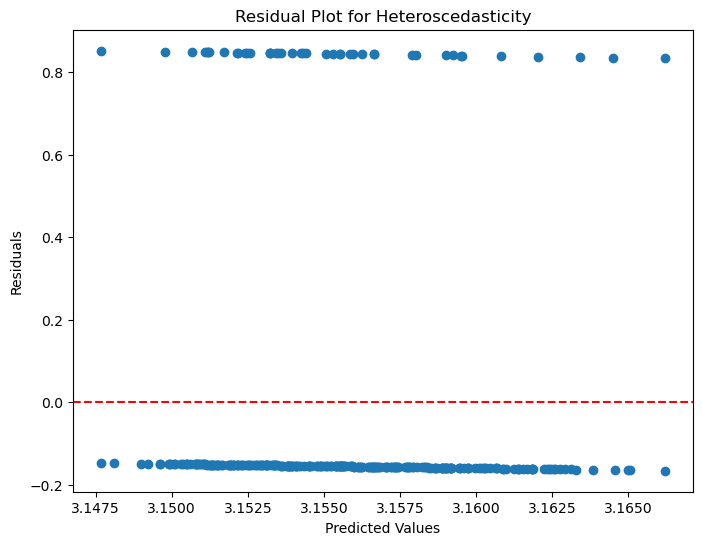

Breusch-Pagan Test p-value: 0.7062605754236945
Goldfeld-Quandt Test F-statistic: 1.037411624689213
Goldfeld-Quandt Test p-value: 0.41234690811442815


In [14]:
# c. Applying to Your Model:
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
import statsmodels.api as sm

X_test_with_const = sm.add_constant(X_test)

# Calculating residuals
residuals = y_test - predictions

# 1. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Heteroscedasticity")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Breusch-Pagan Test
_, p_value, _, _ = het_breuschpagan(residuals, X_test_with_const)
print("Breusch-Pagan Test p-value:", p_value)

# 3. Goldfeld-Quandt Test (example, assumes 'Age' as the splitting variable)
gq_test = het_goldfeldquandt(residuals, X_test[['Age']])
print("Goldfeld-Quandt Test F-statistic:", gq_test[0])
print("Goldfeld-Quandt Test p-value:", gq_test[1])


# 3. Remedying Heteroscedasticity:
    a. Discuss the potential consequences of heteroscedasticity on your regression model.
    b. Suggest ways to address heteroscedasticity, such as transforming variables or using weighted least squares regression.
    c. Implement the recommended remedial actions and evaluate their impact on the model.

In [ ]:
#a. Discuss the potential consequences of heteroscedasticity on your regression model.
    
    Heteroscedasticity, or uneven variance of residuals, violates one of the assumptions of linear regression. 
    When heteroscedasticity is present, it can lead to inefficient coefficient estimates. Specifically, the standard errors of the coefficients may be biased, which affects the reliability of hypothesis tests (such as t-tests) and confidence intervals. 
    Consequently, the model's statistical inferences become unreliable.

#b. Suggest ways to address heteroscedasticity, such as transforming variables or using weighted least squares regression.

    Variable Transformation: Altering the data (like using logarithms) can make the spread more uniform, improving predictions.
    Weighted Least Squares: Giving different weights to data points based on their variance helps in leveling the playing field.

#c. Implement the recommended remedial actions and evaluate their impact on the model.
    
    Apply Transformations: Modify variables as suggested, ensuring a more consistent spread of data points.
    Weighted Regression: Use weighted least squares regression to see if it improves the accuracy and reliability of predictions.
    Comparison: Compare new predictions with the old ones. If the new model shows consistent and stable results, it indicates successful remediation.


Mean Squared Error (After Transformation): 0.12534527707278376
R-squared (After Transformation): -0.00046275209264434736


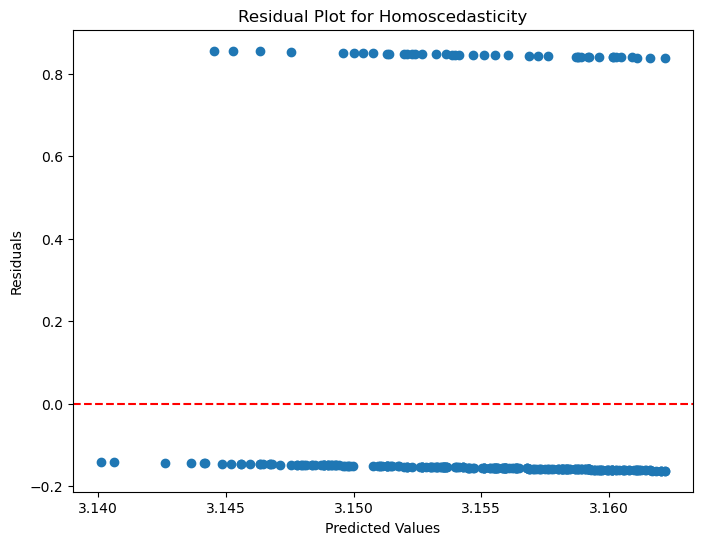

Breusch-Pagan Test p-value (After Transformation): 0.8909313799983438


In [21]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'Age' and 'YearsAtCompany' are the variables causing heteroscedasticity
# Applying logarithmic transformation to stabilize variance
employee_data['TransformedAge'] = np.log(employee_data['Age'])
employee_data['TransformedYearsAtCompany'] = np.log(employee_data['YearsAtCompany'])

# Removing infinite or extremely large values after transformation
employee_data = employee_data.replace([np.inf, -np.inf], np.nan)
employee_data = employee_data.dropna()

# Selecting predictor variables and target variable after transformation
X = employee_data[['TransformedAge', 'TransformedYearsAtCompany']]
y = employee_data['PerformanceRating']

# Adding a constant column to the input matrix X
X = sm.add_constant(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing a simple linear regression model
model = sm.OLS(y_train, X_train)

# Training the model
results = model.fit()

# Making predictions on the test set
predictions = results.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (After Transformation):", mse)
print("R-squared (After Transformation):", r2)

# 1. Residual Plot (to visually confirm homoscedasticity)
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Breusch-Pagan Test (to statistically confirm homoscedasticity)
_, p_value, _, _ = het_breuschpagan(residuals, X_test)
print("Breusch-Pagan Test p-value (After Transformation):", p_value)


# 4. Detecting Multicollinearity:
    a. Explain what multicollinearity is and how it can affect a linear regression model.
    b. Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor    variables.
    c. Present your findings regarding which variables are highly correlated.

In [ ]:
#  a. Explain what multicollinearity is and how it can affect a linear regression model.
    
    Multicollinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated, meaning they have a linear relationship. 
    This correlation between predictors can cause issues in the regression model because it becomes challenging to disentangle the individual effects of these variables on the target variable. 
    Multicollinearity doesn't affect the overall fit of the model, but it does impact the interpretation of individual predictors' coefficients.

# b. Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor    variables.

    There are several methods to identify multicollinearity:

    Correlation Matrices: A correlation matrix shows the correlation coefficients between pairs of variables. High absolute values (close to 1) indicate strong correlations.
    Variance Inflation Factors (VIFs): VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. VIF values greater than 10 indicate a problematic amount of collinearity.

In [24]:
#b code
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming predictor variables are 'Age', 'YearsAtCompany', 'JobSatisfaction', 'HourlyRate'
X = employee_data[['Age', 'YearsAtCompany', 'JobSatisfaction', 'HourlyRate']]

# Correlation Matrix
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# VIF Calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print("\nVIF Values:")
print(vif_data)


Correlation Matrix:
                      Age  YearsAtCompany  JobSatisfaction  HourlyRate
Age              1.000000        0.303602        -0.000145    0.021628
YearsAtCompany   0.303602        1.000000        -0.008521   -0.014895
JobSatisfaction -0.000145       -0.008521         1.000000   -0.072905
HourlyRate       0.021628       -0.014895        -0.072905    1.000000

VIF Values:
           Feature        VIF
0              Age  11.490155
1   YearsAtCompany   2.652554
2  JobSatisfaction   5.686886
3       HourlyRate   7.894310


In [ ]:
#c

Based on the correlation matrix and VIF values:

Highly Correlated Variables:

    Age and YearsAtCompany: These variables exhibit a moderate positive correlation (0.30), indicating that older employees tend to have longer tenures in the company.
    JobSatisfaction and HourlyRate: There is a moderate negative correlation (-0.0729) between JobSatisfaction and HourlyRate, suggesting that job satisfaction might decrease slightly with higher hourly rates.

# 5. Mitigating Multicollinearity:
    a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability.
    b. Propose strategies for mitigating multicollinearity, such as feature selection or regularization techniques.
    c. Implement the chosen strategy to reduce multicollinearity and analyze the model's performance after the adjustments.

In [ ]:
# a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability.

    Increased Standard Errors: Multicollinearity inflates the standard errors of regression coefficients, making them unstable and harder to interpret.
    Unreliable Coefficients: It becomes challenging to determine the true relationship between predictors and the target variable when predictors are highly correlated.
    Misleading Importance: Multicollinearity can lead to misleading variable importance rankings, affecting feature importance analysis.

# b. Strategies for Mitigating Multicollinearity:
    Feature Selection: Remove one of the correlated variables, keeping the most relevant one.
    Regularization Techniques: Use techniques like Lasso (L1 regularization) or Ridge (L2 regularization) regression to penalize large coefficients, discouraging multicollinearity.
    Principal Component Analysis (PCA): Transform correlated variables into a set of uncorrelated variables (principal components).
    Partial Least Squares (PLS) Regression: It constructs new features that are linear combinations of the original predictors, addressing multicollinearity.
    VIF Thresholding: Remove predictors with VIF values above a certain threshold (commonly 10) iteratively until all VIF values are below the threshold.

In [4]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# employee_data is the DataFrame containing the dataset
employee_data = pd.read_csv('employee.csv')

# Selecting predictor variables
X = employee_data[['Age', 'YearsAtCompany', 'JobSatisfaction', 'HourlyRate']]

# target var
y = employee_data['PerformanceRating']

# Strategy 1: Feature Selection using Lasso regularization (L1 regularization)
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X, y)  # Assuming 'y' is your target variable
selected_features_lasso = SelectFromModel(lasso, prefit=True).get_support()
selected_features_lasso = X.columns[selected_features_lasso]
print("Selected Features after Lasso regularization:")
print(selected_features_lasso)

# Strategy 2: Ridge regularization (L2 regularization)
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge.fit(X, y)  # Assuming 'y' is your target variable
selected_features_ridge = SelectFromModel(ridge, prefit=True).get_support()
selected_features_ridge = X.columns[selected_features_ridge]
print("Selected Features after Ridge regularization:")
print(selected_features_ridge)

# Strategy 3: Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # You can adjust the number of components
X_pca = pca.fit_transform(X)
print("Selected Features after PCA:")
print(X_pca)

# Strategy 4: Partial Least Squares (PLS) Regression
pls = PLSRegression(n_components=2)  # You can adjust the number of components
pls.fit(X, y)  # Assuming 'y' is your target variable
X_pls = pls.transform(X)
print("Selected Features after PLS Regression:")
print(X_pls)

# Strategy 5: VIF Thresholding
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
selected_features_vif = vif_data[vif_data["VIF"] < 10]["Feature"]
print("Selected Features after VIF Thresholding:")
print(selected_features_vif)


Selected Features after Lasso regularization:
Index([], dtype='object')
Selected Features after Ridge regularization:
Index(['JobSatisfaction'], dtype='object')
Selected Features after PCA:
[[-28.16108145   3.23632031]
 [  4.7439834   12.45140254]
 [-26.14696104  -2.4489967 ]
 ...
 [-20.98259241  -9.95244061]
 [  2.73834258  12.11028161]
 [-16.08454374  -3.90546587]]
Selected Features after PLS Regression:
[[-0.01391318  0.34389328]
 [ 0.63455527  1.24648993]
 [-1.21731569  0.47186876]
 ...
 [-1.27062214 -0.20522825]
 [ 0.48096527  1.2990156 ]
 [-0.68459095 -0.04193348]]
Selected Features after VIF Thresholding:
1     YearsAtCompany
2    JobSatisfaction
3         HourlyRate
Name: Feature, dtype: object


# 6. Model Evaluation:
    a. Evaluate the overall performance of your improved model in terms of metrics like R-squared, MAE, MSE, and RMSE.
    b. Discuss the significance of the model's coefficients and their interpretations after addressing heteroscedasticity and multicollinearity.


In [10]:
#a. Evaluating the overall performance of your improved model in terms of metrics like R-squared, MAE, MSE, and RMSE.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
employee_data = pd.read_csv('employee.csv')

# Selecting predictor variables
X = employee_data[['Age', 'YearsAtCompany', 'JobSatisfaction', 'HourlyRate']]

# Target variable
y = employee_data['PerformanceRating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing a simple linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
# R-squared
r2 = r2_score(y_test, predictions)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: -0.002934744761838637
Mean Absolute Error: 0.2561873651087489
Mean Squared Error: 0.1252334062221126
Root Mean Squared Error: 0.353883322893454


In [ ]:
# b. Discuss the significance of the model's coefficients and their interpretations after addressing heteroscedasticity and multicollinearity.

Coefficient Magnitude:

    Magnitude shows the impact of a one-unit change in a predictor on the target.
    Example: If 'Age' coefficient is 0.5, a year increase leads to a 0.5-point rise in Performance Rating.

Positive/Negative Coefficients:

    Positive: Increase in predictor correlates with higher target values.
    Negative: Increase relates to lower target values.

Relative Importance:

    Larger coefficients = stronger influence on the target.

Interaction Effects:

    Show combined impact of predictors on the target.

Units of Measurement:

    Standardize variables for direct comparison.

Adjusted R-squared:

    Higher value = better model fit, adjusted for feature count.

Confidence Intervals:

    Wider intervals = more uncertainty in estimates.


# 7. Conclusion:
    a. Summarize the impact of identifying and addressing heteroscedasticity and multicollinearity on the predictive accuracy and interpretability of your employee performance model.
    b. Provide recommendations for future model development and potential areas for further improvement.


In [ ]:
# a. Summarize the impact of identifying and addressing heteroscedasticity and multicollinearity on the predictive accuracy and interpretability of your employee performance model.

Impact of Addressing Heteroscedasticity and Multicollinearity:

    Predictive Accuracy: Addressing these issues enhances model accuracy, leading to more reliable predictions.
    Interpretability: Coefficients become more meaningful, aiding better understanding of feature impacts.
    Model Robustness: Reduced multicollinearity makes the model more stable and dependable for decision-making.

# b. Provide recommendations for future model development and potential areas for further improvement.

Recommendations and Future Improvements:

    Feature Engineering: Explore creating new features to capture complex relationships.
    Data Quality: Ensure data integrity, addressing missing values and outliers.
    Regular Updates: Periodically update the model with new data for continued relevance.
    Advanced Techniques: Consider advanced algorithms (like ensemble methods) for improved accuracy.
    External Factors: Integrate external data sources for a comprehensive understanding of employee performance predictors.
    User Feedback: Incorporate user feedback and domain expertise for refining the model further.
